In [1]:
import tifffile
from griottes.graphmaker import graph_generation_func
from griottes.graphplotter import graph_plot

# Load image and mask of nuclei

First download the image from the latest release of `Griottes`.

In [ ]:
import urllib3
import shutil

url = 'https://github.com/BaroudLab/Griottes/releases/download/v1.0-alpha/zebrafish_brain_cell_labels.tiff'
filename = 'zebrafish_brain_cell_labels.tiff'

c = urllib3.PoolManager()

with c.request('GET',url, preload_content=False) as resp, open(filename, 'wb') as out_file:
    shutil.copyfileobj(resp, out_file)

resp.release_conn()

We then load the image to generate the different graphs from it.

In [2]:
image_path = r'zebrafish_brain_cell_labels.tiff'
image = tifffile.imread(image_path)

# Generating a contact graph

From the masks of the complete cells we can build the contact graph of the network, connecting together cells sharing a common border.

In [3]:
G_contact = graph_generation_func.generate_contact_graph(image[..., 4],
                                                 analyze_fluo_channels=False, 
                                                 radius = 100)

The input image has 2 dimensions, it will be analyzed as a labeled image.
        y      x    area  label  \
0     4.0  128.0   491.0  124.0   
1     6.0   32.0   503.0  128.0   
2     6.0  185.0   611.0  135.0   
3     7.0  291.0   275.0  137.0   
4    17.0  239.0  2445.0  139.0   
5    18.0   77.0  2388.0  147.0   
6    24.0    8.0   913.0  149.0   
7    29.0  179.0  2207.0  153.0   
8    36.0  281.0  1609.0  160.0   
9    50.0  120.0  4708.0  167.0   
10   56.0   44.0  3346.0  173.0   
11   62.0  211.0  1400.0  176.0   
12   82.0    9.0  1192.0  188.0   
13   91.0  150.0  3800.0  193.0   
14   93.0  262.0  6399.0  195.0   
15   99.0  205.0  1482.0  197.0   
16  111.0   79.0  2764.0  204.0   
17  114.0   33.0  2038.0  209.0   
18  129.0  106.0   494.0  215.0   
19  132.0  134.0   337.0  217.0   
20  136.0  198.0  2601.0  219.0   
21  139.0   51.0   496.0  222.0   
22  143.0    9.0  1099.0  227.0   
23  142.0  151.0  1692.0  228.0   
24  157.0  104.0  1493.0  231.0   
25  171.0  228.0

In [ ]:
G_geometric = graph_generation_func.generate_geometric_graph(image[..., 4],
                                                 analyze_fluo_channels=False,
                                                 image_is_2D = True,
                                                 radius = 100)

## Plotting a representation of the graph

From the graph `G` it is possible to plot a visual representation of the network. NetworkX has several plotting functions available for representing graphs, however `Griottes` contains several specific plotting functions adapted for the network representation of tisssues. These functions are called through the `graph_plot` module.

In [ ]:
graph_plot.network_plot_2D(G_geometric,
                figsize = (5,5),
                alpha_line = 1,
                scatterpoint_size = 18,
                weights = False,
                edge_color = 'k',
                line_factor = 0.15)

Adding the `background_image` variable allows to plot the network on to the tissue image of your choice. Here we do it with the contact graph:

In [5]:
import networkx as nx
nx.get_node_attributes(G_contact, "pos")

{124.0: (0, 128.0, 4.0),
 135: (0, 185.0, 6.0),
 147: (0, 77.0, 18.0),
 153: (0, 179.0, 29.0),
 167: (0, 120.0, 50.0),
 128.0: (0, 32.0, 6.0),
 0: (0, nan, nan),
 149: (0, 8.0, 24.0),
 173: (0, 44.0, 56.0),
 139: (0, 239.0, 17.0),
 137.0: (0, 291.0, 7.0),
 160: (0, 281.0, 36.0),
 176: (0, 211.0, 62.0),
 195: (0, 262.0, 93.0),
 188: (0, 9.0, 82.0),
 193: (0, 150.0, 91.0),
 204: (0, 79.0, 111.0),
 209: (0, 33.0, 114.0),
 197: (0, 205.0, 99.0),
 227: (0, 9.0, 143.0),
 215: (0, 106.0, 129.0),
 217: (0, 134.0, 132.0),
 219: (0, 198.0, 136.0),
 228: (0, 151.0, 142.0),
 241: (0, 228.0, 171.0),
 242: (0, 277.0, 174.0),
 222: (0, 51.0, 139.0),
 231: (0, 104.0, 157.0),
 249: (0, 59.0, 184.0),
 248: (0, 142.0, 182.0),
 251: (0, 4.0, 187.0),
 253: (0, 186.0, 189.0),
 270: (0, 174.0, 216.0),
 284: (0, 236.0, 232.0),
 260: (0, 295.0, 199.0),
 274: (0, 286.0, 220.0),
 258: (0, 164.0, 194.0),
 296: (0, 130.0, 244.0),
 276: (0, 42.0, 222.0),
 294: (0, 16.0, 240.0),
 295: (0, 69.0, 244.0),
 301: (0, 180

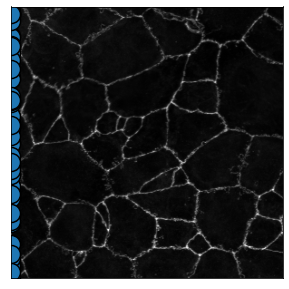

In [4]:
graph_plot.network_plot_2D(G_contact,
                background_image = image[:, :,1],
                figsize = (5,5),
                alpha_line = 1,
                scatterpoint_size = 18,
                legend = True,
                weights = False,
                edge_color = 'w',
                line_factor = 0.15)

We can use the information contained within the masks to extract the shared border size. This is reflected within the network by weighted links. The thicker the edge connecting two nodes, the bigger the shared membrane. To add variable weights, just change the `weights` to `True`.

In [ ]:
graph_plot.network_plot_2D(G_contact,
                background_image = image[:, :,1],
                figsize = (5,5),
                alpha_line = 1,
                scatterpoint_size = 18,
                legend = True,
                weights = True,
                edge_color = 'w',
                line_factor = 0.15)